In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced statistical visualizations
import cv2  # OpenCV for image processing
import os  # For interacting with the operating system
import numpy as np  # For numerical operations

In [3]:
import zipfile

zip_file_path = '/content/drive/My Drive/GPF.zip'
csv_file_name = 'ArSL_Data_Labels.csv'
image_dir_name = 'ArASL_Database_54K_Final'

In [4]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_name)  # Extracing the CSV file
    for file in zip_ref.namelist():
        if file.startswith(image_dir_name):  # Extracting all files from the image directory
            zip_ref.extract(file)

In [5]:
csv_file_path = csv_file_name
image_dir = image_dir_name

In [6]:
df = pd.read_csv(csv_file_path)

In [7]:
df.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [8]:
print("the dataframe (csv file) has 3 columns:")
print("# : this column shows the data point number.")
print("File_Name : this column shows the file name corresponding to its class as a .jpg file. each file is a photo of an alphabet in its sign language symbol.")
print("Class : this column shows the alphabet as a class of the corresponding file.")


the dataframe (csv file) has 3 columns:
# : this column shows the data point number.
File_Name : this column shows the file name corresponding to its class as a .jpg file. each file is a photo of an alphabet in its sign language symbol.
Class : this column shows the alphabet as a class of the corresponding file.


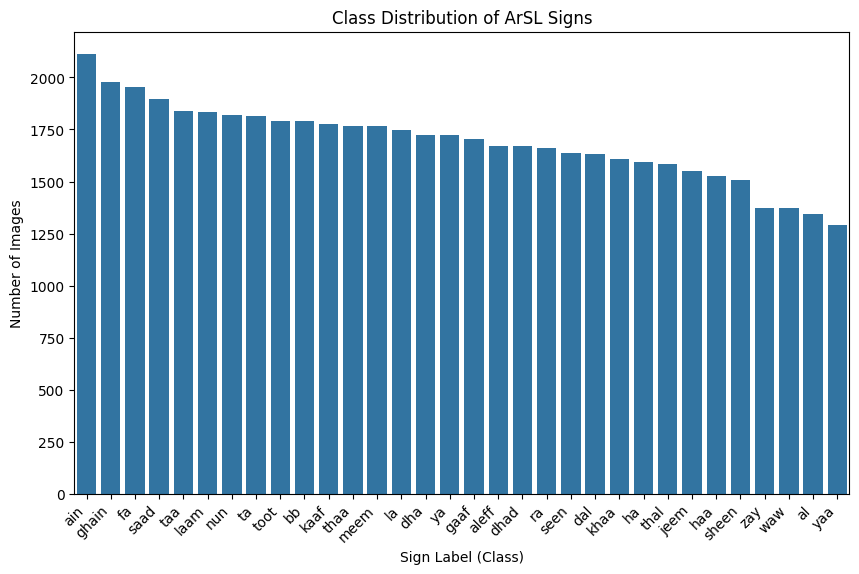

Class Counts:
 Class
ain      2114
ghain    1977
fa       1955
saad     1895
taa      1838
laam     1832
nun      1819
ta       1816
toot     1791
bb       1791
kaaf     1774
thaa     1766
meem     1765
la       1746
dha      1723
ya       1722
gaaf     1705
aleff    1672
dhad     1670
ra       1659
seen     1638
dal      1634
khaa     1607
ha       1592
thal     1582
jeem     1552
haa      1526
sheen    1507
zay      1374
waw      1371
al       1343
yaa      1293
Name: count, dtype: int64


In [9]:
# EDA: Class Distribution
class_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, order=class_counts.index)
plt.title('Class Distribution of ArSL Signs')
plt.xlabel('Sign Label (Class)')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Class Counts:\n", class_counts)

In [10]:
min_class_count = class_counts.min()
max_class_count = class_counts.max()

print(f"Minimum Class Count: {min_class_count}")
print(f"Maximum Class Count: {max_class_count}")

Minimum Class Count: 1293
Maximum Class Count: 2114


In [15]:
print("the difference between the maximum class count and the minimum class count is 821 (less than a factor of 2)")

the difference between the maximum class count and the minimum class count is 821 (less than a factor of 2)


In [11]:
num_classes = len(class_counts)
print(f"Number of Classes: {num_classes}")

Number of Classes: 32


In [14]:
print("we can see that the 28 Arabic alphabets are the values under the Class column with 4 additional alpahebet mixes and forms that are frequently used in the Arabic language which are:")
print("al (ال)")
print("la (لا)")
print("toot (ة)")
print("ya (ئ)")

we can see that the 28 Arabic alphabets are the values under the Class column with 4 additional alpahebet mixes and forms that are frequently used in the Arabic language which are:
al (ال)
la (لا)
toot (ة)
ya (ئ)


In [12]:
print('Conclusion: The dataset exhibits some level of class imbalance, where certain classes (alphabets) have a larger number of associated images than others. This imbalance could potentially introduce a bias in the model, making it more accurate in predicting the more frequent classes while having lower accuracy for the less frequent ones.')

Conclusion: The dataset exhibits some level of class imbalance, where certain classes (alphabets) have a larger number of associated images than others. This imbalance could potentially introduce a bias in the model, making it more accurate in predicting the more frequent classes while having lower accuracy for the less frequent ones.
